In [1]:
import pandas as pd
import requests
import urllib3
import os
import pickle
import sys
from pathlib import Path
# sys.path.append(str(Path(__file__).parent))
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
cache_file = 'cache/demand_data_cache.pkl'

if os.path.exists(cache_file):
    demand_data = pickle.load(open(cache_file, 'rb'))
    print(f"Loaded from cache: {demand_data.shape}")
else:
    urls = {
        '2009': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/ed8a37cb-65ac-4581-8dbc-a3130780da3a/download/demanddata_2009.csv',
        '2010': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b3eae4a5-8c3c-4df1-b9de-7db243ac3a09/download/demanddata_2010.csv',
        '2011': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/01522076-2691-4140-bfb8-c62284752efd/download/demanddata_2011.csv',
        '2012': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/4bf713a2-ea0c-44d3-a09a-63fc6a634b00/download/demanddata_2012.csv',
        '2013': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/2ff7aaff-8b42-4c1b-b234-9446573a1e27/download/demanddata_2013.csv',
        '2014': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b9005225-49d3-40d1-921c-03ee2d83a2ff/download/demanddata_2014.csv',
        '2015': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/cc505e45-65ae-4819-9b90-1fbb06880293/download/demanddata_2015.csv',
        '2016': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/3bb75a28-ab44-4a0b-9b1c-9be9715d3c44/download/demanddata_2016.csv',
        '2017': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/2f0f75b8-39c5-46ff-a914-ae38088ed022/download/demanddata_2017.csv',
        '2018': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/fcb12133-0db0-4f27-a4a5-1669fd9f6d33/download/demanddata_2018.csv',
        '2019': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/dd9de980-d724-415a-b344-d8ae11321432/download/demanddata_2019.csv',
        '2020': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/33ba6857-2a55-479f-9308-e5c4c53d4381/download/demanddata_2020.csv',
        '2021': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/18c69c42-f20d-46f0-84e9-e279045befc6/download/demanddata_2021.csv',
        '2022': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/bb44a1b5-75b1-4db2-8491-257f23385006/download/demanddata_2022.csv',
        '2023': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/bf5ab335-9b40-4ea4-b93a-ab4af7bce003/download/demanddata_2023.csv',
        '2024': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/f6d02c0f-957b-48cb-82ee-09003f2ba759/download/demanddata_2024.csv',
        '2025': 'https://api.neso.energy/dataset/8f2fe0af-871c-488d-8bad-960426f24601/resource/b2bde559-3455-4021-b179-dfe60c0337b0/download/demanddata_2025.csv'
    }

    all_data = []
    for year, url in urls.items():
        response = requests.get(url, verify=False)
        yearly_data = pd.read_csv(pd.io.common.StringIO(response.text))
        yearly_data['YEAR'] = year
        all_data.append(yearly_data)
        print(f"{year}: {yearly_data.shape}")

    demand_data = pd.concat(all_data, ignore_index=True)
    pickle.dump(demand_data, open(cache_file, 'wb'))
    print(f"Cached data: {demand_data.shape}")

print(f"Final: {demand_data.shape}")

Loaded from cache: (293566, 23)
Final: (293566, 23)


In [3]:
demand_data.sort_values(['SETTLEMENT_DATE'], ascending=False)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,YEAR,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,SCOTTISH_TRANSFER
259995,31-Oct-23,28,32044,33553,29358,1251,6488,2201,16559,0,...,251,-447,-455,999,2023,1395.0,997.0,0.0,0.0,1971.0
260003,31-Oct-23,36,37207,37809,34048,1202,6488,0,16559,0,...,549,27,0,1019,2023,1395.0,993.0,0.0,0.0,2397.0
259994,31-Oct-23,27,32014,33597,29345,1305,6488,2415,16559,0,...,281,-451,-527,999,2023,1395.0,997.0,0.0,0.0,2308.0
259973,31-Oct-23,6,21084,22842,19520,1355,6488,0,16559,0,...,466,-372,-527,505,2023,1395.0,999.0,0.0,0.0,3535.0
259996,31-Oct-23,29,32049,33631,29359,1191,6488,1756,16559,0,...,-299,-370,-303,970,2023,1396.0,997.0,0.0,0.0,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,01-APR-2009,31,40938,41821,36921,216,1613,0,0,0,...,0,-376,0,0,2009,NaN,NaN,NaN,NaN,NaN
4347,01-APR-2009,30,41371,42185,37366,216,1613,0,0,0,...,0,-306,0,0,2009,NaN,NaN,NaN,NaN,NaN
4346,01-APR-2009,29,41701,42508,37694,168,1613,0,0,0,...,0,-296,0,0,2009,NaN,NaN,NaN,NaN,NaN
4345,01-APR-2009,28,41905,42710,37859,168,1613,0,0,0,...,0,-296,0,0,2009,NaN,NaN,NaN,NaN,NaN


In [4]:
demand_data['SETTLEMENT_DATE'] = pd.to_datetime(demand_data['SETTLEMENT_DATE'])

/var/folders/l8/p1qr4lw566x40b3d6dqt7dpr0000gs/T/ipykernel_64344/1222740280.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  demand_data['SETTLEMENT_DATE'] = pd.to_datetime(demand_data['SETTLEMENT_DATE'])


In [5]:
demand_data['TSD_ND_GAP'] = demand_data['TSD'] - demand_data['ND']

In [6]:
demand_data

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,YEAR,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW,SCOTTISH_TRANSFER,TSD_ND_GAP
0,2009-01-01,1,37910,38704,33939,54,1403,0,0,0,...,-161,0,0,2009,NaN,NaN,NaN,NaN,NaN,794
1,2009-01-01,2,38047,38964,34072,53,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,917
2,2009-01-01,3,37380,38651,33615,53,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1271
3,2009-01-01,4,36426,37775,32526,50,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1349
4,2009-01-01,5,35687,37298,31877,50,1403,0,0,0,...,-160,0,0,2009,NaN,NaN,NaN,NaN,NaN,1611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293561,2025-09-29,44,28422,29869,26027,730,6606,0,20993,0,...,-6,0,543,2025,1397.0,998.0,-611.0,20.0,2605.0,1447
293562,2025-09-29,45,26347,28021,24145,746,6606,0,20993,0,...,27,0,80,2025,1397.0,980.0,-566.0,146.0,2817.0,1674
293563,2025-09-29,46,25181,26858,23128,762,6606,0,20993,0,...,0,0,45,2025,1397.0,978.0,-564.0,106.0,3011.0,1677
293564,2025-09-29,47,23861,25542,21935,801,6606,0,20993,0,...,-25,0,125,2025,1397.0,995.0,-777.0,7.0,3040.0,1681


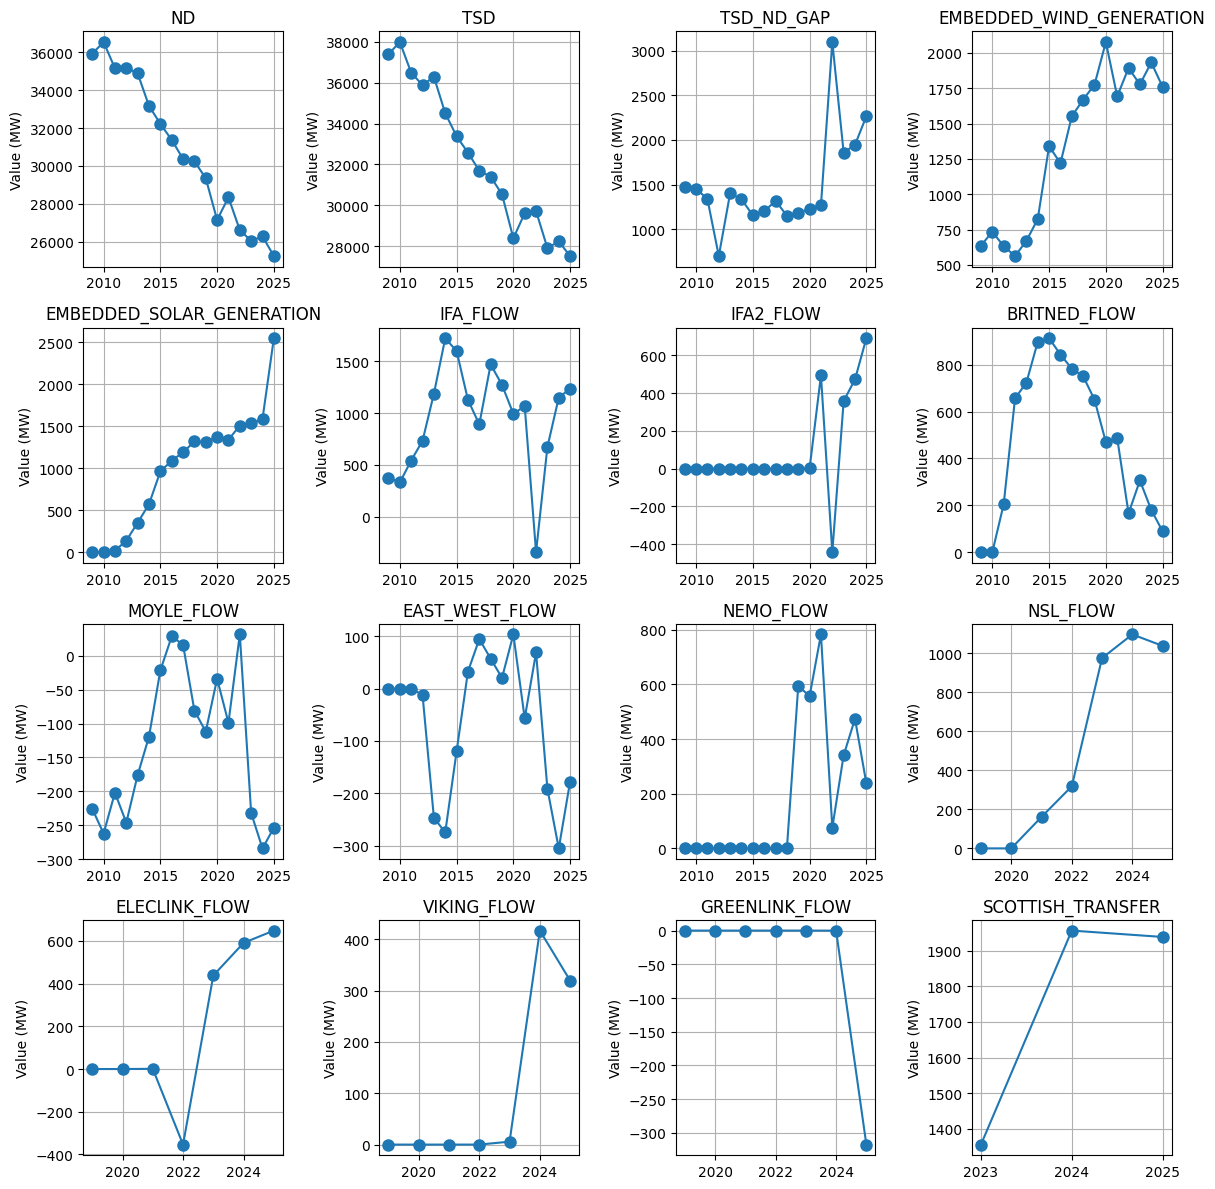

In [7]:
import math
import matplotlib.pyplot as plt
# First subplot - Yearly average demand
yearly_averages = demand_data.groupby(demand_data['SETTLEMENT_DATE'].dt.year).mean(numeric_only=True).reset_index()
cols = [x for x in yearly_averages.columns if x not in ['SETTLEMENT_DATE','SETTLEMENT_PERIOD']]
cols = ['ND', 'TSD', 'TSD_ND_GAP','EMBEDDED_WIND_GENERATION', 'EMBEDDED_SOLAR_GENERATION', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW','EAST_WEST_FLOW','NEMO_FLOW', 'NSL_FLOW','ELECLINK_FLOW','VIKING_FLOW','GREENLINK_FLOW','SCOTTISH_TRANSFER']
n_cols = len(cols)
grid_size = math.ceil(math.sqrt(n_cols))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(3*grid_size, 3*grid_size))

for i, col in enumerate(cols):
    ax = axes[i // grid_size, i % grid_size]
    ax.plot(yearly_averages['SETTLEMENT_DATE'], yearly_averages[col], marker='o', markersize=8)
    ax.set_title(f'{col}')
    ax.grid(True)
    ax.set_ylabel('Value (MW)')

plt.tight_layout()
plt.show()

In [8]:
import json
import pandas as pd
  # Load the JSON file
with open('generation_mix.json', 'r') as f:
    gen_data = json.load(f)
generation_df = pd.DataFrame(gen_data['result']['records'])
print(generation_df.shape)

(294552, 36)
